In [1]:
import sys
import os

import numpy as np

current_path = os.getcwd()  # 获取当前工作目录
print("当前路径:", current_path)
current_path = current_path.replace('/samples', '')
print(sys.path)
sys.path.append(current_path)
print(sys.path)

当前路径: /Users/yang/PycharmProjects/Option/samples
['/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/jupyter_debug', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa']
['/Users/yang/PycharmProjects/Option/samples', '/Users/yang/PycharmProjects/Option', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/pydev', '/Applications/PyCharm.app/Contents/plugins/python-ce/helpers/jupyter_debug', '/opt/anaconda3/lib/python312.zip', '/opt/anaconda3/lib/python3.12', '/opt/anaconda3/lib/python3.12/lib-dynload', '', '/opt/anaconda3/lib/python3.12/site-packages', '/opt/anaconda3/lib/python3.12/site-packages/aeosa', '/Users/yang/PycharmProjects/Option']


In [2]:
from src.utils import plot_multi_y_axis
import matplotlib.pyplot as plt

In [3]:
import pandas as pd
df = pd.read_feather(r'../data/tsla_2019_2022.feather')
df.head(10)

,QUOTE_UNIXTIME,QUOTE_DATE,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
1536366,1546462800,2019-01-02,310.12,2019-01-04,1546635600,0.89752,0.00000,0.03123,-0.10511,0.00100,...,0.01,-0.00193,0.00011,0.00155,-0.03743,-0.00053,2.38828,0.0,135.1,0.436
1536367,1546462800,2019-01-02,310.12,2019-01-04,1546635600,0.89822,0.00006,0.03228,-0.53068,0.00249,...,0.02,-0.00474,0.00015,0.00365,-0.08675,-0.00010,2.49584,4.0,130.1,0.420
1536368,1546462800,2019-01-02,310.12,2019-01-04,1546635600,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.02,-0.00041,0.00000,0.00103,-0.00991,0.00000,1.92119,0.0,125.1,0.403
1536369,1546462800,2019-01-02,310.12,2019-01-04,1546635600,0.90392,0.00012,0.03202,-0.52977,0.00221,...,0.02,-0.00144,0.00010,0.00145,-0.02916,0.00000,2.01225,1.0,120.1,0.387
1536370,1546462800,2019-01-02,310.12,2019-01-04,1546635600,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.01,-0.00095,0.00009,0.00081,-0.01419,0.00000,1.79481,2.0,115.1,0.371
1536371,1546462800,2019-01-02,310.12,2019-01-04,1546635600,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.01,0.00000,0.00007,0.00084,-0.00507,-0.00012,1.55763,34.0,110.1,0.355
1536372,1546462800,2019-01-02,310.12,2019-01-04,1546635600,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.01,-0.00097,0.00007,0.00132,-0.01489,0.00000,1.61323,78.0,105.1,0.339
1536373,1546462800,2019-01-02,310.12,2019-01-04,1546635600,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.02,-0.00158,0.00014,0.00087,-0.01468,-0.00019,1.52702,11.0,100.1,0.323
1536374,1546462800,2019-01-02,310.12,2019-01-04,1546635600,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.02,-0.00151,0.00009,0.00099,-0.01462,-0.00005,1.44319,69.0,95.1,0.307
1536375,1546462800,2019-01-02,310.12,2019-01-04,1546635600,1.00000,0.00000,0.00000,0.00000,0.00000,...,0.05,-0.00109,0.00010,0.00109,-0.01419,-0.00052,1.35812,116.0,90.1,0.291


In [4]:
import numpy as np
all_dates = df.QUOTE_DATE.drop_duplicates().values
all_dates.sort()
all_dates.min(), all_dates.max()

('2019-01-02', '2022-12-30')

In [5]:
all_dates[0][:5], all_dates[0][6:8], all_dates[0][9:]


('2019-', '1-', '2')

# 2019-01-02这一天

In [10]:
today = '2019-01-02'

## 2019-01-02 的不同到期日的平值期权

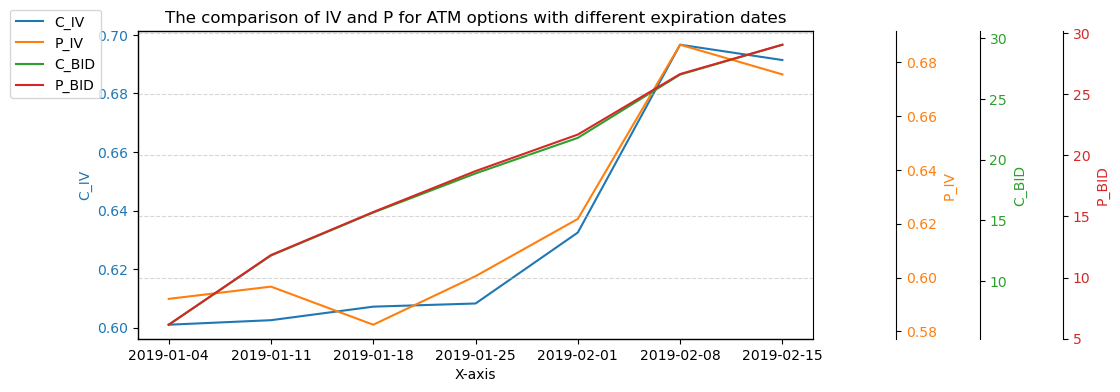

In [22]:
# 平值期权
today_at_the_money_df = df[(df['QUOTE_DATE'] == today) & (df['STRIKE_DISTANCE'] < 5)].copy()
today_at_the_money_df.sort_values(['STRIKE_DISTANCE'], ascending=True, inplace=True)
today_at_the_money_df.drop_duplicates('EXPIRE_DATE', inplace=True)
today_at_the_money_df.sort_values(['EXPIRE_DATE'], ascending=True, inplace=True)
plot_multi_y_axis(
    today_at_the_money_df['EXPIRE_DATE'], today_at_the_money_df[['C_IV', 'P_IV', 'C_BID', 'P_BID']],
    title = 'The comparison of IV and P for ATM options with different expiration dates',
    figsize=(18, 4)
)

## 2019-01-02, 2019-02-08到期的不同strike的期权 (微笑曲线)

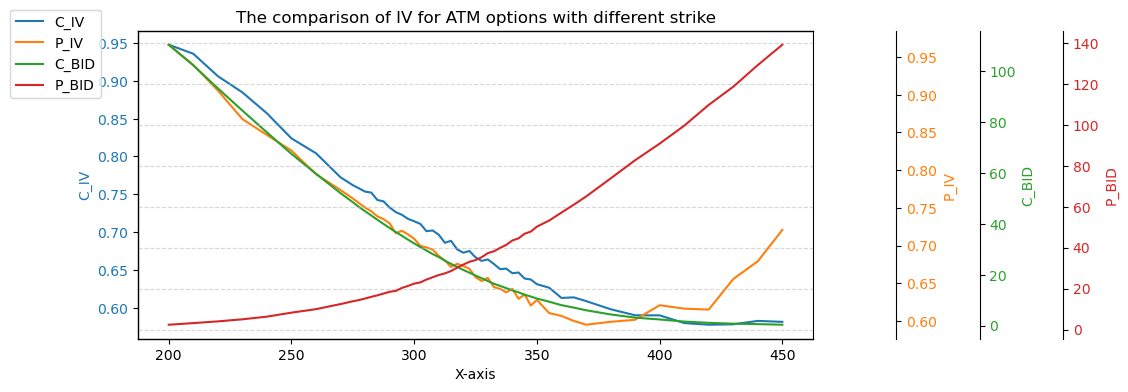

In [21]:
today_at_the_money_df = df[(df['EXPIRE_DATE'] == '2019-02-08') & (df['QUOTE_DATE'] == today)].copy()
plot_multi_y_axis(
    today_at_the_money_df['STRIKE'], today_at_the_money_df[['C_IV', 'P_IV', 'C_BID', 'P_BID']],
    title = 'The comparison of IV and Price for ATM options with different strike',
    figsize=(18, 4)
)

# 获得 strike 是310，到期日是 EXPIRE_DATE = '2019-02-08'的期权

In [23]:
# 平值期权
today_at_the_money_df = df[(df['EXPIRE_DATE'] == '2019-02-08') & (df['STRIKE'] == 310)].copy()
today_at_the_money_df['QUOTE_DATE'] = pd.to_datetime(today_at_the_money_df['QUOTE_DATE'])
today_at_the_money_df

,QUOTE_UNIXTIME,QUOTE_DATE,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
1536899,1546462800,2019-01-02,310.12,2019-02-08,1549659600,0.54540,0.00571,0.39538,-0.36728,0.14651,...,27.08,-0.45523,0.00573,0.39433,-0.36194,-0.16382,0.68635,3.0,0.1,0.000
1538214,1546549200,2019-01-03,300.37,2019-02-08,1549659600,0.48485,0.00607,0.37935,-0.35657,0.11894,...,27.08,-0.51903,0.00631,0.37966,-0.34818,-0.18771,0.66262,0.0,9.6,0.032
1539688,1546635600,2019-01-04,317.67,2019-02-08,1549659600,0.58337,0.00580,0.38697,-0.36142,0.14114,...,23.18,-0.41446,0.00603,0.38632,-0.36316,-0.15035,0.65399,17.0,7.7,0.024
1541164,1546894800,2019-01-07,334.97,2019-02-08,1549659600,0.68155,0.00502,0.35764,-0.38884,0.16755,...,17.07,-0.31723,0.00510,0.35679,-0.38334,-0.10636,0.69794,21.0,25.0,0.075
1542646,1546981200,2019-01-08,335.29,2019-02-08,1549659600,0.68297,0.00505,0.35081,-0.39152,0.14654,...,15.06,-0.31449,0.00516,0.35056,-0.38962,-0.10477,0.69755,11.0,25.3,0.075
1544148,1547067600,2019-01-09,338.46,2019-02-08,1549659600,0.70008,0.00494,0.34157,-0.40412,0.16284,...,14.67,-0.29737,0.00498,0.34055,-0.39427,-0.09462,0.70713,17.0,28.5,0.084
1545652,1547154000,2019-01-10,345.00,2019-02-08,1549659600,0.72730,0.00442,0.32479,-0.40449,0.14287,...,15.88,-0.26773,0.00464,0.32393,-0.39768,-0.08592,0.72405,17.0,35.0,0.101
1547229,1547240400,2019-01-11,347.23,2019-02-08,1549659600,0.74340,0.00446,0.31175,-0.39312,0.65439,...,11.49,-0.24961,0.00468,0.30983,-0.37964,-0.08161,0.70036,12.0,37.2,0.107
1548714,1547499600,2019-01-14,334.40,2019-02-08,1549659600,0.68702,0.00544,0.31294,-0.43778,0.12038,...,13.35,-0.30926,0.00572,0.31220,-0.42955,-0.08199,0.69831,29.0,24.4,0.073
1550236,1547586000,2019-01-15,344.21,2019-02-08,1549659600,0.73551,0.00491,0.29081,-0.42367,0.12045,...,10.70,-0.25540,0.00513,0.28768,-0.41518,-0.06652,0.70209,22.0,34.2,0.099


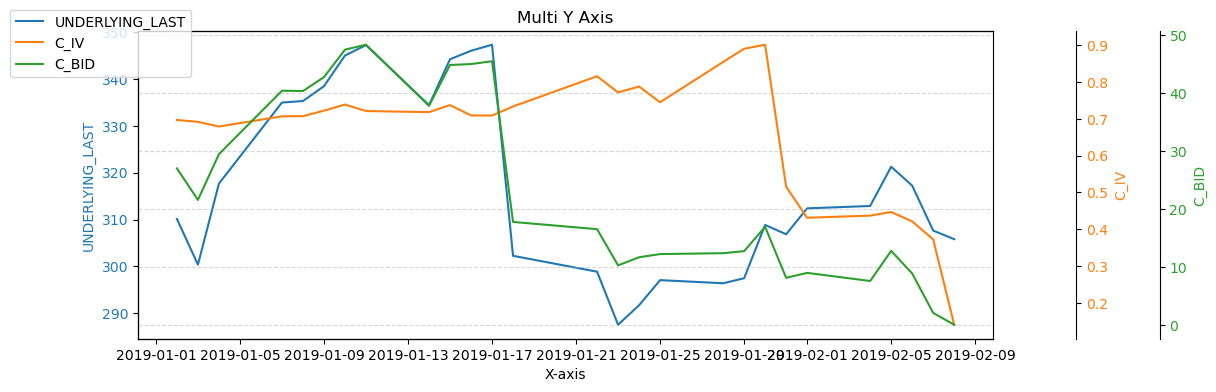

In [24]:
plot_multi_y_axis(
    today_at_the_money_df['QUOTE_DATE'], today_at_the_money_df[['UNDERLYING_LAST', 'C_IV', 'C_BID']],
    figsize=(18, 4)
)

# 期权价格是310，不同到期日的iv和 bid price

In [25]:
today_at_the_money_df = df[(df['EXPIRE_DATE'] >= '2019-01-20') & (df['QUOTE_DATE'] <= '2019-02-08') & (df['STRIKE'] == 310)].copy()
today_at_the_money_df['QUOTE_DATE'] = pd.to_datetime(today_at_the_money_df['QUOTE_DATE'])
today_at_the_money_df

,QUOTE_UNIXTIME,QUOTE_DATE,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
1536722,1546462800,2019-01-02,310.12,2019-01-25,1548450000,0.53101,0.00822,0.31399,-0.40552,0.09024,...,19.30,-0.46889,0.00841,0.31436,-0.40339,-0.10688,0.60052,530.0,0.1,0.000
1536819,1546462800,2019-01-02,310.12,2019-02-01,1549054800,0.53429,0.00694,0.35669,-0.36440,0.11463,...,22.00,-0.46474,0.00711,0.35727,-0.36982,-0.14000,0.62175,14.0,0.1,0.000
1536899,1546462800,2019-01-02,310.12,2019-02-08,1549659600,0.54540,0.00571,0.39538,-0.36728,0.14651,...,27.08,-0.45523,0.00573,0.39433,-0.36194,-0.16382,0.68635,3.0,0.1,0.000
1536988,1546462800,2019-01-02,310.12,2019-02-15,1550264400,0.54700,0.00525,0.42923,-0.33081,0.16146,...,29.15,-0.45342,0.00537,0.42968,-0.32860,-0.20813,0.67534,181.0,0.1,0.000
1538021,1546549200,2019-01-03,300.37,2019-01-25,1548450000,0.44395,0.00884,0.29553,-0.38898,0.07225,...,21.43,-0.55901,0.00908,0.29523,-0.38346,-0.11903,0.57914,30.0,9.6,0.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082769,1549659600,2019-02-08,305.80,2019-03-01,1551474000,0.46838,0.01214,0.29630,-0.29935,0.07637,...,17.70,-0.53139,0.01226,0.29661,-0.30527,-0.10570,0.43539,5.0,4.2,0.014
1082867,1549659600,2019-02-08,305.80,2019-03-08,1552078800,0.48009,0.01017,0.34187,-0.26905,0.10131,...,19.73,-0.52068,0.01038,0.34120,-0.27256,-0.13930,0.44723,1.0,4.2,0.014
1082965,1549659600,2019-02-08,305.80,2019-03-15,1552680000,0.48911,0.00896,0.38131,-0.24580,0.12583,...,19.65,-0.51171,0.00907,0.38124,-0.24968,-0.17248,0.45793,80.0,4.2,0.014
1083065,1549659600,2019-02-08,305.80,2019-03-22,1553284800,0.49585,0.00800,0.41702,-0.22974,0.15033,...,21.97,-0.50559,0.00833,0.41663,-0.22827,-0.20617,0.45786,10.0,4.2,0.014


In [ ]:
plt.figure(figsize=(14, 4))

for expire_date, group in today_at_the_money_df.groupby('EXPIRE_DATE'):
    plt.plot(group['QUOTE_DATE'], group['C_IV'], label=f'Expiry: {expire_date}')

plt.title('C_IV Comparison by Expiry Date')
plt.xlabel('Quote Date')
plt.ylabel('Implied Volatility (C_IV)')
plt.legend(
    bbox_to_anchor=(1.05, 1),  # 图例锚点位于图形右侧外侧（1.05表示右侧5%偏移）
    loc='upper left',          # 图例的左上角对齐锚点
    borderaxespad=0            # 图例与图形的间距
)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14, 4))

for expire_date, group in today_at_the_money_df.groupby('EXPIRE_DATE'):
    plt.plot(group['QUOTE_DATE'], group['P_IV'], label=f'Expiry: {expire_date}')

plt.title('P_IV Comparison by Expiry Date')
plt.xlabel('Quote Date')
plt.ylabel('Implied Volatility (P_IV)')
plt.legend(
    bbox_to_anchor=(1.05, 1),  # 图例锚点位于图形右侧外侧（1.05表示右侧5%偏移）
    loc='upper left',          # 图例的左上角对齐锚点
    borderaxespad=0            # 图例与图形的间距
)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14, 4))

for expire_date, group in today_at_the_money_df.groupby('EXPIRE_DATE'):
    plt.plot(group['QUOTE_DATE'], group['C_BID'], label=f'Expiry: {expire_date}')

plt.title('C_BID Comparison by Expiry Date')
plt.xlabel('Quote Date')
plt.ylabel('Implied Volatility (C_BID)')
plt.legend(
    bbox_to_anchor=(1.05, 1),  # 图例锚点位于图形右侧外侧（1.05表示右侧5%偏移）
    loc='upper left',          # 图例的左上角对齐锚点
    borderaxespad=0            # 图例与图形的间距
)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14, 4))

for expire_date, group in today_at_the_money_df.groupby('EXPIRE_DATE'):
    plt.plot(group['QUOTE_DATE'], group['P_BID'], label=f'Expiry: {expire_date}')

plt.title('P_BID Comparison by Expiry Date')
plt.xlabel('Quote Date')
plt.ylabel('Implied Volatility (P_BID)')
plt.legend(
    bbox_to_anchor=(1.05, 1),  # 图例锚点位于图形右侧外侧（1.05表示右侧5%偏移）
    loc='upper left',          # 图例的左上角对齐锚点
    borderaxespad=0            # 图例与图形的间距
)
plt.grid(True)
plt.show()

# 2019-02-08 到期的不同strike的期权

In [14]:
today_at_the_money_df = df[(df['EXPIRE_DATE'] == '2019-02-08') & (df['STRIKE'].isin([280, 290, 300, 310, 320, 330]))].copy()
today_at_the_money_df['QUOTE_DATE'] = pd.to_datetime(today_at_the_money_df['QUOTE_DATE'])
today_at_the_money_df

,QUOTE_UNIXTIME,QUOTE_DATE,UNDERLYING_LAST,EXPIRE_DATE,EXPIRE_UNIX,C_DELTA,C_GAMMA,C_VEGA,C_THETA,C_RHO,...,P_LAST,P_DELTA,P_GAMMA,P_VEGA,P_THETA,P_RHO,P_IV,P_VOLUME,STRIKE_DISTANCE,STRIKE_DISTANCE_PCT
1536887,1546462800,2019-01-02,310.12,2019-02-08,1549659600,0.70633,0.00462,0.34299,-0.34478,0.17880,...,15.57,-0.29275,0.00457,0.34323,-0.34235,-0.10663,0.75046,3.0,30.1,0.097
1536891,1546462800,2019-01-02,310.12,2019-02-08,1549659600,0.65655,0.00503,0.36634,-0.35797,0.16943,...,20.40,-0.34276,0.00510,0.36690,-0.35694,-0.12425,0.72954,4.0,20.1,0.065
1536895,1546462800,2019-01-02,310.12,2019-02-08,1549659600,0.60257,0.00545,0.38464,-0.36613,0.15871,...,21.43,-0.39727,0.00542,0.38463,-0.36331,-0.14402,0.70901,36.0,10.1,0.033
1536899,1546462800,2019-01-02,310.12,2019-02-08,1549659600,0.54540,0.00571,0.39538,-0.36728,0.14651,...,27.08,-0.45523,0.00573,0.39433,-0.36194,-0.16382,0.68635,3.0,0.1,0.000
1536903,1546462800,2019-01-02,310.12,2019-02-08,1549659600,0.48473,0.00590,0.39752,-0.35639,0.13234,...,33.90,-0.51411,0.00590,0.39689,-0.35671,-0.18308,0.67300,3.0,9.9,0.032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082425,1549659600,2019-02-08,305.80,2019-02-08,1549659600,1.00000,0.00000,0.00000,-0.00018,0.00585,...,0.01,-0.00320,0.00146,0.00141,-0.00516,0.00000,0.42999,NaN,15.8,0.052
1082429,1549659600,2019-02-08,305.80,2019-02-08,1549659600,1.00000,0.00000,0.00000,0.00000,0.00610,...,0.02,-0.00692,0.00778,0.00209,-0.00512,0.00000,0.17323,NaN,5.8,0.019
1082433,1549659600,2019-02-08,305.80,2019-02-08,1549659600,0.01529,0.01989,0.00553,-0.01046,0.00032,...,4.55,-0.84336,0.05697,0.03282,-0.32520,-0.00406,0.29869,NaN,4.2,0.014
1082437,1549659600,2019-02-08,305.80,2019-02-08,1549659600,0.00345,0.00197,0.00112,-0.00509,0.00038,...,14.50,-0.92896,0.01049,0.01841,-0.19975,-0.00314,0.65039,526.0,14.2,0.046


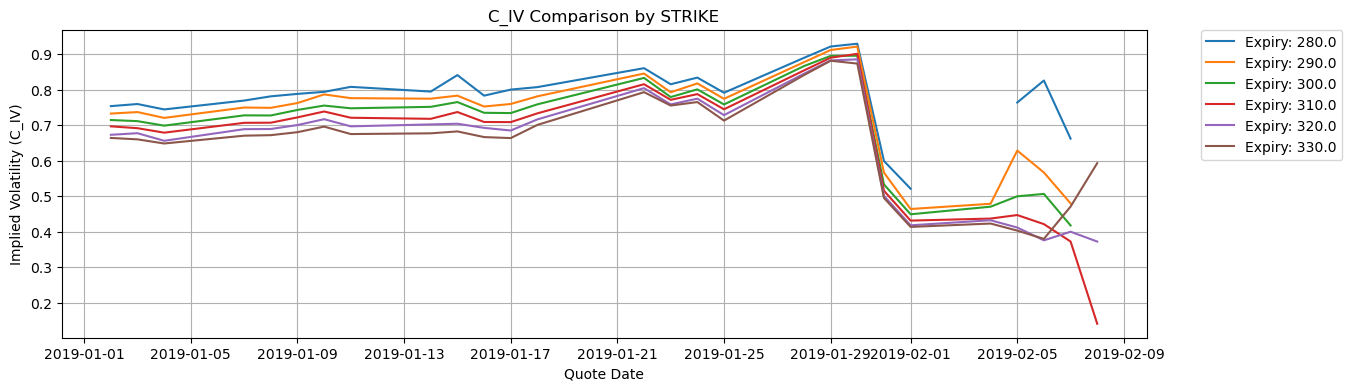

In [15]:
plt.figure(figsize=(14, 4))

for STRIKE, group in today_at_the_money_df.groupby('STRIKE'):
    plt.plot(group['QUOTE_DATE'], group['C_IV'], label=f'Expiry: {STRIKE}')

plt.title('C_IV Comparison by STRIKE')
plt.xlabel('Quote Date')
plt.ylabel('Implied Volatility (C_IV)')
plt.legend(
    bbox_to_anchor=(1.05, 1),  # 图例锚点位于图形右侧外侧（1.05表示右侧5%偏移）
    loc='upper left',          # 图例的左上角对齐锚点
    borderaxespad=0            # 图例与图形的间距
)
plt.grid(True)
plt.show()

In [ ]:
plt.figure(figsize=(14, 4))

for STRIKE, group in today_at_the_money_df.groupby('STRIKE'):
    plt.plot(group['QUOTE_DATE'], group['C_BID'], label=f'Expiry: {STRIKE}')

plt.title('C_BID Comparison by Expiry Date')
plt.xlabel('Quote Date')
plt.ylabel('Implied Volatility (C_BID)')
plt.legend(
    bbox_to_anchor=(1.05, 1),  # 图例锚点位于图形右侧外侧（1.05表示右侧5%偏移）
    loc='upper left',          # 图例的左上角对齐锚点
    borderaxespad=0            # 图例与图形的间距
)
plt.grid(True)
plt.show()